In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from utils.helpers import extract_images_and_labels, extract_images
from src.images_preprocessing import preprocess_images

### Visualize

Visualization is done with all images.

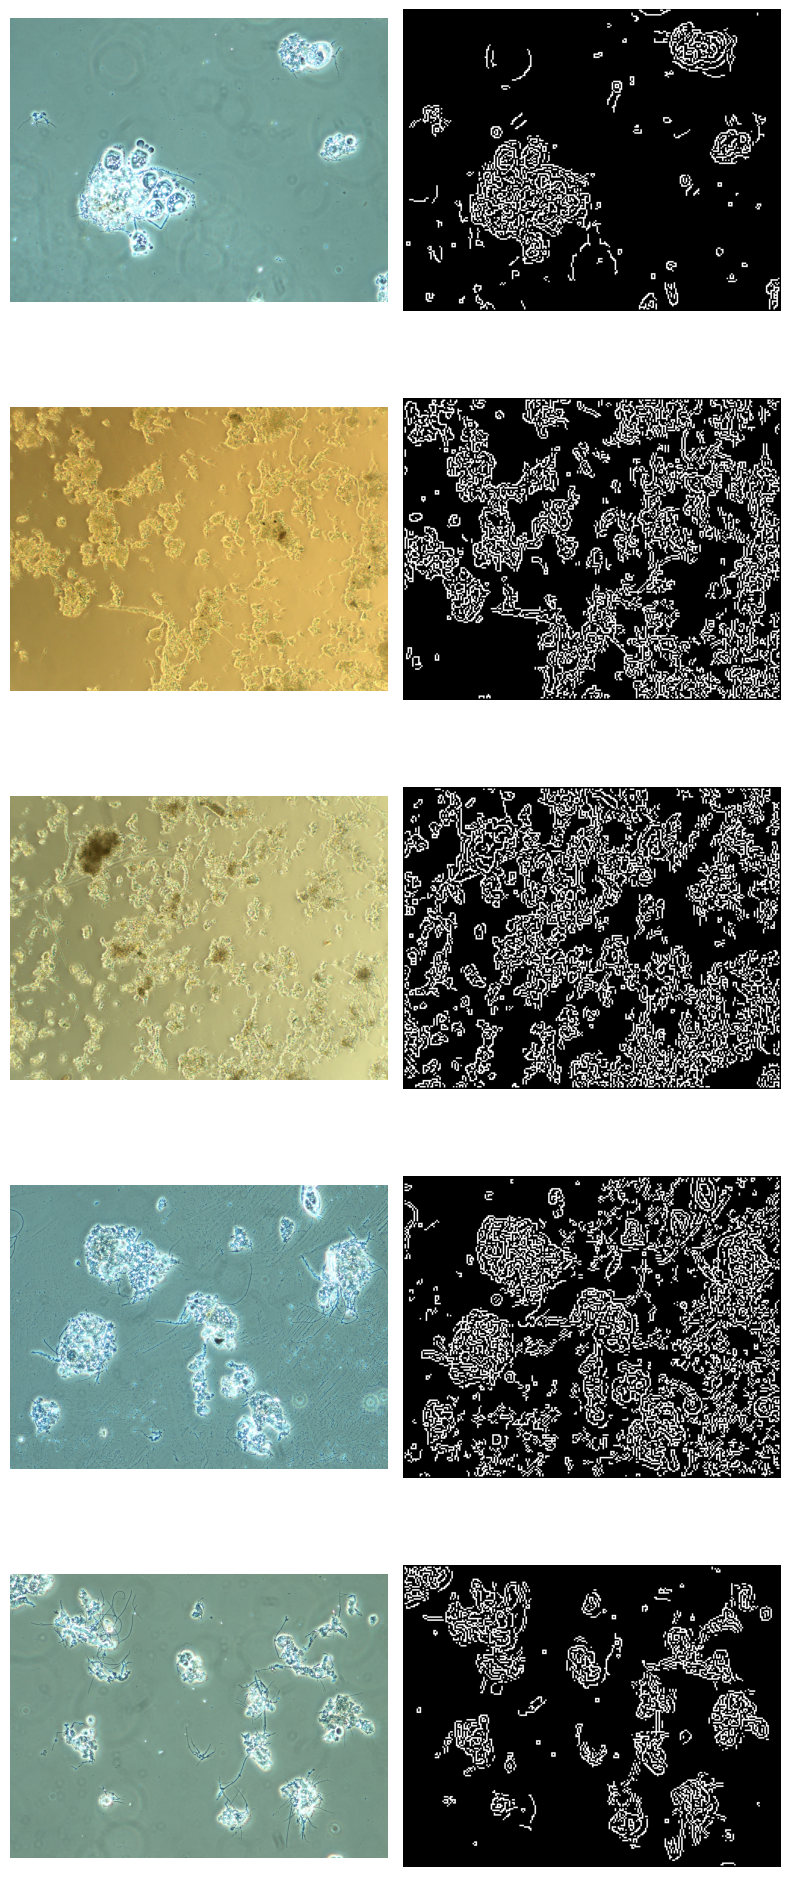

In [ ]:
#Load and preprocess images (edge detection + flatten)
base_folder = "data/microscope_images_forvisualisation" #this folder doesn't contain all images (since for some dates no SVI label is available in 2025)
SVI=pd.read_csv('data/SVI.csv', index_col=0)

all_images, all_labels = extract_images_and_labels(base_folder, SVI, image_type='all')

all_images_processed=preprocess_images(all_images=all_images, size=(250,200), method='edges', flatten=True, show_example=True)

pca = PCA(n_components=5)
embeddings_all_visualisation = pca.fit_transform(all_images_processed)

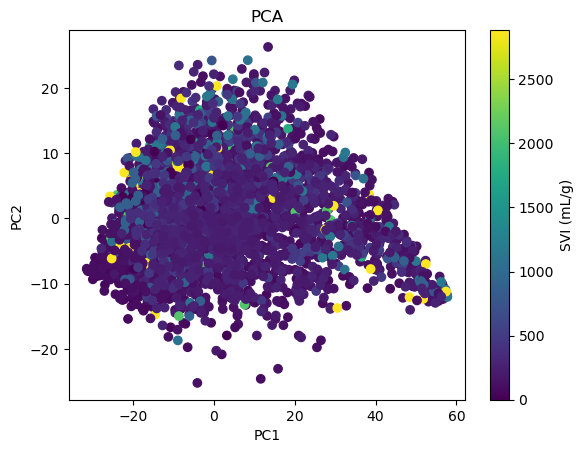

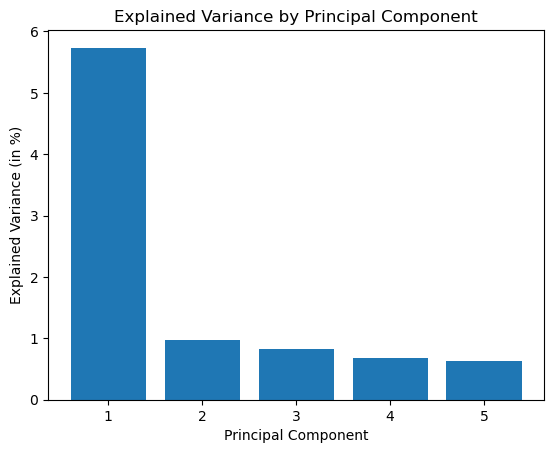

In [ ]:
# create 2D figure
plt.figure()
sc=plt.scatter(embeddings_all_visualisation[:,0], embeddings_all_visualisation[:,1], c=all_labels)
cbar = plt.colorbar(sc)
cbar.set_label('SVI (mL/g)') 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f"PCA")
plt.savefig('results/visualisation/PCA/2Dscatter_plot_all_images_edgedetection.pdf')
plt.savefig('results/visualisation/PCA/2Dscatter_plot_all_images_edgedetection.png')
plt.show()

explained_variance = pca.explained_variance_ratio_
plt.figure()
plt.bar(range(1, len(explained_variance) + 1),
         explained_variance*100) 
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.savefig('results/visualisation/PCA/explained_variance_all_images_edgedetection.pdf')
plt.savefig('results/visualisation/PCA/explained_variance_all_images_edgedetection.png')
plt.show()

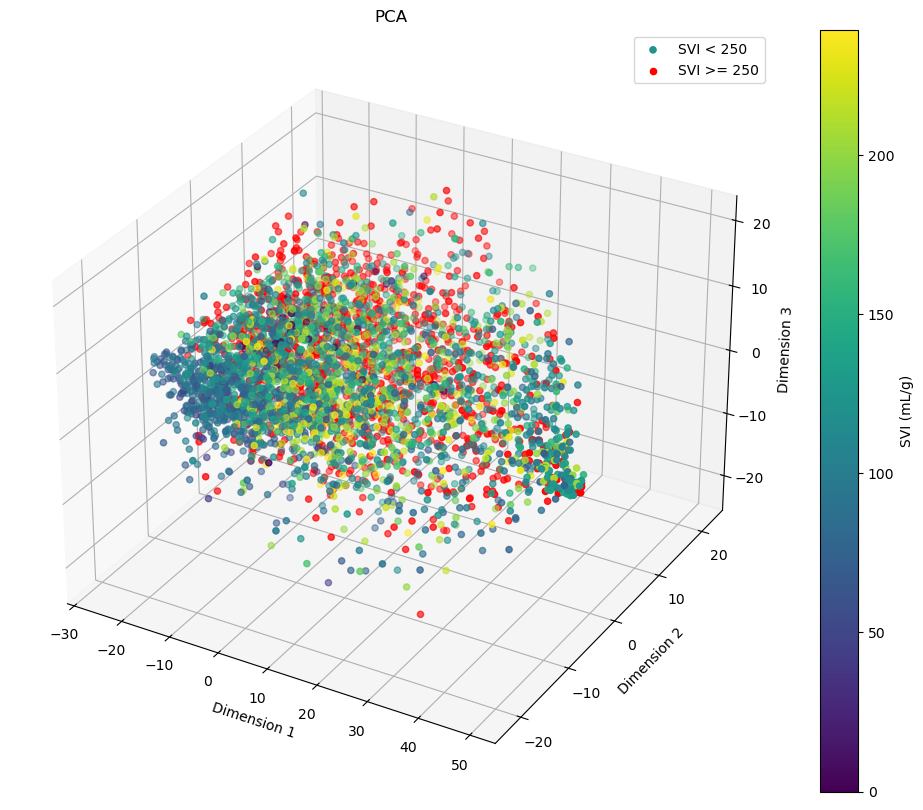

In [36]:
# 3D plot with outliers (SVI>250 in a different colour)
threshold = 250
image_labels2 = all_labels.ravel()
outliers = (image_labels2 > threshold).ravel()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(embeddings_all_visualisation[~outliers, 0], 
                embeddings_all_visualisation[~outliers, 1], 
                embeddings_all_visualisation[~outliers, 2], 
                c=all_labels[~outliers], cmap='viridis', label='SVI < 250')
ax.scatter(embeddings_all_visualisation[outliers, 0], 
           embeddings_all_visualisation[outliers, 1], 
           embeddings_all_visualisation[outliers, 2], c='red', label='SVI >= 250')
cbar = plt.colorbar(sc)
cbar.set_label('SVI (mL/g)')
plt.legend()
#ax.view_init(elev=25, azim=30)  # Change elevation and azimuth angles
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_xlim(min(embeddings_all_visualisation[:, 0]), max(embeddings_all_visualisation[:, 0])*0.95)  # Example zoom for x-axis
ax.set_ylim(min(embeddings_all_visualisation[:, 1]), max(embeddings_all_visualisation[:, 1])*0.95)  # Example zoom for y-axis
ax.set_zlim(min(embeddings_all_visualisation[:, 2]), max(embeddings_all_visualisation[:, 2])*0.95)  # Example zoom for z-axis
plt.tight_layout() 
plt.title(f"PCA")
plt.savefig('results/visualisation/PCA/3Dscatter_plot_all_images_edgedetection.pdf')
plt.savefig('results/visualisation/PCA/3Dscatter_plot_all_images_edgedetection.png')
plt.show()

### Save embeddings for HM

To create embeddings to be used in hybrid model, only train images are used. Afterwards, embeddings for all images are created (for evaluation).

In [13]:
base_folder = "data/microscope_images"
train_images = extract_images(base_folder, image_type='train')
train_images_processed=preprocess_images(train_images, size=(250,200), method='edges', flatten=True, show_example=False)

all_images = extract_images(base_folder, image_type='all')
all_images_processed=preprocess_images(all_images, size=(250,200), method='edges', flatten=True, show_example=False)


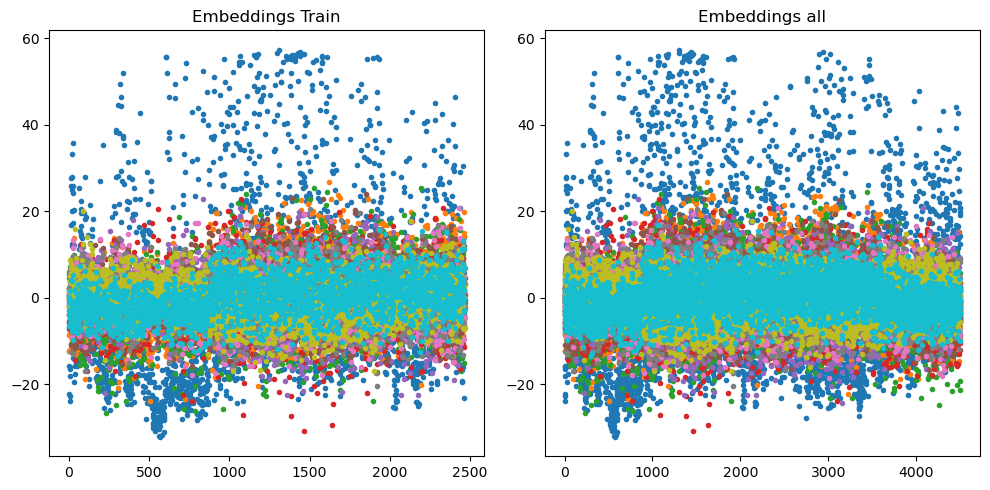

In [15]:
pca = PCA(n_components=10)
embeddings_train = pca.fit_transform(train_images_processed)
embeddings_all = pca.transform(all_images_processed)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  
axes[0].plot(embeddings_train, '.')
axes[0].set_title('Embeddings Train')
axes[1].plot(embeddings_all, '.')
axes[1].set_title('Embeddings all')
plt.tight_layout()
plt.savefig('results/embeddings/PCA/embeddings_visualized.pdf')
plt.show()

embeddings_train_df = pd.DataFrame(embeddings_train)
embeddings_all_df = pd.DataFrame(embeddings_all)

embeddings_train_df.to_csv('results/embeddings/PCA/pca_embeddings_10D_train.csv', index=False)
embeddings_all_df.to_csv('results/embeddings/PCA/pca_embeddings_10D_all.csv', index=False)
